
# <p style="background-color:#8b7a5e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:30px 30px;">Autistic Patients Classification Using ANN</p>


# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Import Needed Libraries</p>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model #for model visualization

from warnings import filterwarnings
filterwarnings('ignore')



# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Read dataset into DataFrame</p>

In [4]:
df = pd.read_csv(r'E:\Trainings\My AI Projects\Full Projects\Deep\Autistic Patients Classification Using ANN\autism_screening.csv')
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


# **<font color = #208AAE>DataFrame Columns</font>**

In [5]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Features Metadata</p>

|Feature | Description
|------|------------
|**index** | The participant’s **ID number**
|**AX_Score**|Score based on the Autism Spectrum Quotient (AQ) 10 item screening tool [AQ-10](https://docs.autismresearchcentre.com/tests/AQ10.pdf)
|**age**|Age of participant
|**gender**|**'m'** for Male and **'f'** for Female
|**ethnicity**|Ethnicities in text form **['White-European', 'Latino', '?', 'Others', 'Black', 'Asian','Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic','Turkish', 'others']**
|**jaundice**|**'no' and 'yes'** for Whether or not the participant was born with jaundice?
|**autism**|**'no' and 'yes'** for Whether or not anyone in the immediate family has been diagnosed with autism?
|**country_of_res**|Countries in text format
|**used_app_before**|**'no' and 'yes'** for Whether the participant has used a screening app
|**result**|Score from the AQ-10 screening tool
|**age_desc**|Age as categorical **['18 and more']**
|**relation**|Relation of person who completed the test **['Self', 'Parent', '?', 'Health care professional', 'Relative','Others']**
|**Class/ASD**|Participant classification **['NO', 'YES']**



# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Exploratory Data Analysis</p>

# **<font color = #208AAE>DataFrame Shape</font>**

In [6]:
#print number of rows and columns in the dataset

print("Number of Rows:",df.shape[0])
print("Number of Features:",df.shape[1])

Number of Rows: 704
Number of Features: 21


# **<font color = #208AAE>DataFrame Info</font>**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

### **<font color = #208AAE>From previous result we can put in our mind that:</font>**

#### **<font color = #8b7a5e>Numerical Features are:</font>**

- 'A1_Score'
- 'A2_Score'
- 'A3_Score'
- 'A4_Score'
- 'A5_Score'
- 'A6_Score'
- 'A7_Score'
- 'A8_Score'
- 'A9_Score'
- 'A10_Score'
- 'age'
- 'result'

#### **<font color = #8b7a5e>Categorical Features (which need encoding later) are:</font>**

- 'gender'
- 'ethnicity'
- 'jundice'
- 'austim'
- 'contry_of_res'
- 'used_app_before'
-'age_desc'
- 'relation'
- 'Class/ASD'

#### **<font color = #8b7a5e>Columns that have null values (which need handling later):</font>**

- 'age'

In [8]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

# **<font color = #208AAE>Statistical Info for Numerical Features</font>**

In [9]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


# **<font color = #208AAE>Exploring Numerical Features</font>**

#### **<font color = #8b7a5e>'age' Feature</font>**

In [10]:
df['age'].value_counts()

age
21.0     49
20.0     46
23.0     37
22.0     37
19.0     35
24.0     34
27.0     31
18.0     31
30.0     30
26.0     28
25.0     27
29.0     27
28.0     24
31.0     21
17.0     18
32.0     18
35.0     17
37.0     17
33.0     16
40.0     16
42.0     15
36.0     13
38.0     12
34.0     12
43.0     11
44.0     10
47.0      8
39.0      7
53.0      6
55.0      6
46.0      6
50.0      5
52.0      5
45.0      4
48.0      4
49.0      3
41.0      3
58.0      2
54.0      2
56.0      2
61.0      2
59.0      1
64.0      1
60.0      1
383.0     1
51.0      1
Name: count, dtype: int64

# **<font color = #8b7a5e>Handling outliers</font>**

**'age' contains an outlier (383.0) since it is only a single value I will drop its row**

<Axes: ylabel='age'>

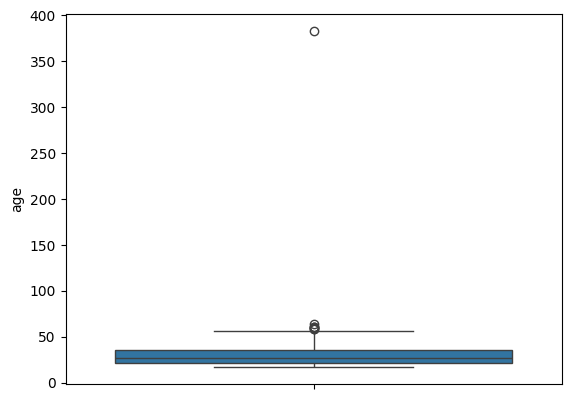

In [11]:
#draw boxplot to check for outliers
sns.boxplot(df['age'])

In [12]:
#drop the outliers
df = df.drop(df[df['age'] == 383].index)

In [13]:
df['age'].value_counts()

age
21.0    49
20.0    46
23.0    37
22.0    37
19.0    35
24.0    34
18.0    31
27.0    31
30.0    30
26.0    28
29.0    27
25.0    27
28.0    24
31.0    21
32.0    18
17.0    18
35.0    17
37.0    17
33.0    16
40.0    16
42.0    15
36.0    13
34.0    12
38.0    12
43.0    11
44.0    10
47.0     8
39.0     7
53.0     6
55.0     6
46.0     6
50.0     5
52.0     5
45.0     4
48.0     4
49.0     3
41.0     3
56.0     2
61.0     2
54.0     2
58.0     2
60.0     1
59.0     1
64.0     1
51.0     1
Name: count, dtype: int64

<Axes: ylabel='age'>

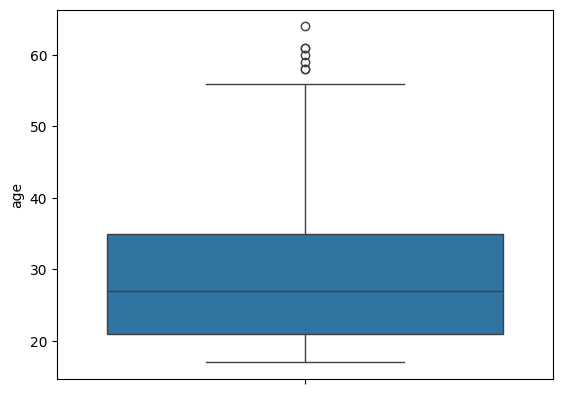

In [14]:
#draw boxplot to check for outliers
sns.boxplot(df['age'])

# **<font color = #8b7a5e>Handling Missing values</font>**

**since the data is not large I will use Imputing with mean to handle null values**

In [15]:
df['age'].isnull().sum()

2

In [16]:
#fill the missing values with the mean value of that column rounded to the nearest whole number
df['age'] = df['age'].fillna(round(df['age'].mean()))

In [17]:
df['age'].isnull().sum()

0

# **<font color = #208AAE>Exploring Categorical Features</font>**

- 'gender'
- 'ethnicity'
- 'jundice'
- 'austim'
- 'contry_of_res'
- 'used_app_before'
-'age_desc'
- 'relation'
- 'Class/ASD'

In [18]:
df['gender'].value_counts()

gender
m    367
f    336
Name: count, dtype: int64

In [19]:
df['ethnicity'].value_counts()

ethnicity
White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
others               1
Name: count, dtype: int64

**'ethnicity' has invalid value that need to be replaced**

**we will replace '?' with 'others'**

In [20]:
df['ethnicity'] = df['ethnicity'].replace('?', 'others')

In [21]:
df['ethnicity'].value_counts()

ethnicity
White-European     233
Asian              123
others              96
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
Name: count, dtype: int64

In [22]:
df['jundice'].value_counts()

jundice
no     634
yes     69
Name: count, dtype: int64

In [23]:
df['austim'].value_counts()

austim
no     612
yes     91
Name: count, dtype: int64

In [24]:
df['contry_of_res'].value_counts()

contry_of_res
United States           113
United Arab Emirates     82
India                    81
New Zealand              80
United Kingdom           77
                       ... 
China                     1
Chile                     1
Lebanon                   1
Burundi                   1
Cyprus                    1
Name: count, Length: 67, dtype: int64

In [25]:
df['used_app_before'].value_counts()

used_app_before
no     691
yes     12
Name: count, dtype: int64

In [26]:
df['age_desc'].value_counts()

age_desc
18 and more    703
Name: count, dtype: int64

In [27]:
df['relation'].value_counts()

relation
Self                        521
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: count, dtype: int64

**'relation' has invalid value that need to be replaced**

**we will replace '?' with 'Others'**

In [28]:
df['relation'] = df['relation'].replace('?', 'Others')

In [29]:
df['relation'].value_counts()

relation
Self                        521
Others                      100
Parent                       50
Relative                     28
Health care professional      4
Name: count, dtype: int64

In [30]:
df['Class/ASD'].value_counts()

Class/ASD
NO     514
YES    189
Name: count, dtype: int64


# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Data Visualization</p>

In [31]:
#using plotly to visualize the number of autistic and non-autistic patients
fig = px.histogram(df, x='Class/ASD')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show()

In [32]:
#using plotly to visualize the average age of autistic and non-autistic patients
fig = px.bar(df.groupby('Class/ASD', as_index=False).agg({'age':'mean'}), 
             x='Class/ASD', 
             y='age', 
             color='Class/ASD',
             title='Average Age of Autistic and Non-Autistic Patients')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Age of Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show()

In [33]:
#using plotly to visualize the count of the gender 
fig = px.histogram(df, x='gender')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of Males and Females </b>', title_x=0.5)

# Show the plot
fig.show()

    

In [34]:
#using plotly to visualize the count of the males and females for autistic and non-autistic patients
fig = px.bar(df.groupby(['Class/ASD', 'gender']).size().reset_index(name='count'), 
             x='Class/ASD', 
             y='count', 
             color='gender',
             title='Count of Males and Females of Autistic and Non-Autistic Patients')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of Males and Females of Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show()  

In [35]:
# Count of Autistic Patients in Different Countries
filtered_df = df[df['Class/ASD'] == "YES"]

# Create a histogram
fig = px.histogram(filtered_df, x='contry_of_res')

# Update layout to center the title and set the category order
fig.update_layout(
    title_text='<b>Count of Autistic Patients in Different Countries</b>',
    title_x=0.5,
    xaxis=dict(categoryorder='total descending')
)

# Show the plot
fig.show()

In [36]:
#using plotly to visualize the count of age_desc for autistic and non-autistic patients
fig = px.bar(df.groupby(['Class/ASD', 'age_desc']).size().reset_index(name='count'), 
             x='Class/ASD', 
             y='count', 
             color='age_desc',
             title='Count of People over 18 for Autistic and Non-Autistic Patients')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of People over 18 for Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show() 

In [37]:
#using plotly to visualize 'jundice' with pie chart
fig = px.pie(df, names='jundice')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of People with Jaundice</b>', title_x=0.5)

# Show the plot
fig.show()

In [38]:
#using plotly to visualize the count of people with jundice for autistic and non-autistic patients
fig = px.bar(df.groupby(['Class/ASD', 'jundice']).size().reset_index(name='count'), 
             x='Class/ASD', 
             y='count', 
             color='jundice',
             title='Count of people with jundice for Autistic and Non-Autistic Patients')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of people with jundice for Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show()  

In [39]:
#using plotly to visualize 'used_app_before' with pie chart
fig = px.pie(df, names='used_app_before')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of People who used the screening App before</b>', title_x=0.5)

# Show the plot
fig.show()

In [40]:
#using plotly to visualize used_app_before for autistic and non-autistic patients
fig = px.bar(df.groupby(['Class/ASD', 'used_app_before']).size().reset_index(name='count'), 
             x='Class/ASD', 
             y='count', 
             color='used_app_before',
             title='Count of People who used the screening App before for Autistic and Non-Autistic Patients')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of People who used the screening App before for Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show()  


# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Data Preprocessing</p>

# **<font color = #208AAE>Drop Unneeded Column </font>**

In [41]:
#drop the 'age_desc' column
df = df.drop('age_desc', axis=1)

# **<font color = #208AAE>Splitting Features from Target </font>**

In [42]:
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

# **<font color = #208AAE>Handling Categorical Features</font>**

- 'gender'
- 'ethnicity'
- 'jundice'
- 'austim'
- 'contry_of_res'
- 'used_app_before'
- 'relation'
- 'Class/ASD'

In [43]:
# Columns to apply label encoding
cols_to_encode = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']

# Apply label encoding to X
label_encoder_X = LabelEncoder()
for col in cols_to_encode:
    X[col] = label_encoder_X.fit_transform(X[col])

# Apply label encoding to y
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

In [44]:
X.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,64,0,6.0,4
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,13,0,5.0,4
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,56,0,8.0,2
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,64,0,6.0,4
4,1,0,0,0,0,0,0,1,0,0,40.0,0,10,0,0,22,0,2.0,1
5,1,1,1,1,1,0,1,1,1,1,36.0,1,5,1,0,64,0,9.0,4
6,0,1,0,0,0,0,0,1,0,0,17.0,0,1,0,0,64,0,2.0,4
7,1,1,1,1,0,0,0,0,1,0,64.0,1,9,0,0,43,0,5.0,2
8,1,1,0,0,1,0,0,1,1,1,29.0,1,9,0,0,64,0,6.0,4
9,1,1,1,1,0,1,1,1,1,0,17.0,1,0,1,1,9,0,8.0,0


In [45]:
y[:5]

array([0, 0, 1, 0, 0])

# **<font color = #208AAE>Data Scaling</font>**

In [46]:
X['age'].value_counts()

age
21.0    49
20.0    46
23.0    37
22.0    37
19.0    35
24.0    34
18.0    31
27.0    31
30.0    30
29.0    29
26.0    28
25.0    27
28.0    24
31.0    21
32.0    18
17.0    18
35.0    17
37.0    17
40.0    16
33.0    16
42.0    15
36.0    13
38.0    12
34.0    12
43.0    11
44.0    10
47.0     8
39.0     7
55.0     6
53.0     6
46.0     6
52.0     5
50.0     5
48.0     4
45.0     4
49.0     3
41.0     3
58.0     2
54.0     2
56.0     2
61.0     2
64.0     1
59.0     1
60.0     1
51.0     1
Name: count, dtype: int64

In [47]:
X['result'].value_counts()

result
4.0     131
3.0     110
5.0      83
2.0      74
6.0      70
7.0      57
8.0      55
9.0      47
1.0      32
10.0     30
0.0      14
Name: count, dtype: int64

In [48]:
# Columns to scale
cols_to_scale = ['result', 'age']

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [49]:
X['age'].value_counts()

age
0.085106    49
0.063830    46
0.127660    37
0.106383    37
0.042553    35
0.148936    34
0.021277    31
0.212766    31
0.276596    30
0.255319    29
0.191489    28
0.170213    27
0.234043    24
0.297872    21
0.319149    18
0.000000    18
0.382979    17
0.425532    17
0.489362    16
0.340426    16
0.531915    15
0.404255    13
0.446809    12
0.361702    12
0.553191    11
0.574468    10
0.638298     8
0.468085     7
0.808511     6
0.765957     6
0.617021     6
0.744681     5
0.702128     5
0.659574     4
0.595745     4
0.680851     3
0.510638     3
0.872340     2
0.787234     2
0.829787     2
0.936170     2
1.000000     1
0.893617     1
0.914894     1
0.723404     1
Name: count, dtype: int64

In [50]:
X['result'].value_counts()

result
0.4    131
0.3    110
0.5     83
0.2     74
0.6     70
0.7     57
0.8     55
0.9     47
0.1     32
1.0     30
0.0     14
Name: count, dtype: int64

# **<font color = #208AAE>Splitting data into Train Test</font>**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (562, 19)
Shape of Y_train is: (562,)

Shape of X_test is: (141, 19)
Shape of Y_test is: (141,)



# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Building ANN Model</p>

### **<font color = "purple">Model Structure</font>**

In [53]:
model = Sequential([
        Dense(16, activation='relu', input_dim=19),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
])

### **<font color = "purple">Model Compiling</font>**

In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **<font color = "purple">Model Summary</font>**

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                320       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 465 (1.82 KB)
Trainable params: 465 (1.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **<font color = "purple">Model Visualization</font>**

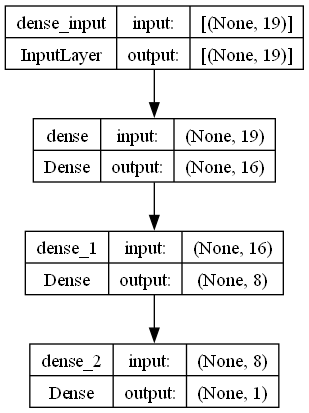

In [56]:
# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### **<font color = "purple">Model Fitting</font>**

In [ ]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)

In [ ]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
# tr_acc = history.history['accuracy']
# tr_loss = history.history['loss']
# val_acc = history.history['val_accuracy']
# val_loss = history.history['val_loss']

# epochs = [i+1 for i in range(len(tr_acc))]

# plt.figure(figsize=(20, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs, tr_loss, 'r', label='Train Loss')
# plt.plot(epochs, val_loss, 'g', label='Valid Loss')
# plt.title('Loss')
# plt.legend()
# plt.xlabel('Epochs')
# plt.ylabel('Loss')

# plt.subplot(1, 2, 2)
# plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
# plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
# plt.title('Accuracy')
# plt.legend()
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.tight_layout()
# plt.show()